![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [75]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load files
flights = pd.read_csv('flights2022.csv')
weather = pd.read_csv('flights_weather2022.csv')

# Creeate date column for the weather data
weather.loc[:,'date'] = pd.to_datetime(pd.concat([weather['year'].astype(str),                         weather['month'].astype(str).str.zfill(2),                                         weather['day'].astype(str).str.zfill(2)], axis=1))

# Create Route columns for both datasets
flights.loc[:,'route'] = flights['origin'] + '-' + flights['dest']
weather.loc[:,'route'] = weather['origin'] + '-' + weather['dest']

# Remove unecessary columns
weather.drop(columns=['year','month','day'], inplace=True)
flights.drop(columns=['origin','dest'], inplace=True)

display(flights.head(), weather.head())

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,air_time,distance,hour,minute,time_hour,airline,route
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,SEA-IAH
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,SEA-FAI
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ATL
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ORD
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,PDX-ORD


,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date
0,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01
2,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
3,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01
4,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01


In [76]:
# For routes, calculate the average departure delays and highest number of canceled flights and store this as a DataFrame called routes_delays_cancels, resetting the index after calculating.

routes_delays_cancels = flights.groupby('route').agg({'dep_delay':'mean', 'dep_time':lambda x: x.isna().sum()}).reset_index()

display(routes_delays_cancels.head(15))

,route,dep_delay,dep_time
0,PDX-ABQ,1.098039,2
1,PDX-ANC,4.748936,4
2,PDX-ATL,7.020979,13
3,PDX-AUS,5.435374,5
4,PDX-BOI,5.136430,7
5,PDX-BOS,24.812500,4
6,PDX-BUR,4.659574,6
7,PDX-BZN,-0.714286,1
8,PDX-CLT,13.217949,3
9,PDX-DAL,24.100000,0


In [77]:
# Identify routes with the highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values("dep_delay", ascending=False).head(9)

# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("dep_time", ascending=False).head(9)

In [78]:
# For airlines, determine the average departure delays and the highest number of canceled flights and store this as a DataFrame called airlines_delays_cancels, resetting the index after calculating.

airlines_delays_cancels = flights.groupby('airline').agg({'dep_delay':'mean', 'dep_time':lambda x: x.isna().sum()}).reset_index()

display(airlines_delays_cancels.head())

,airline,dep_delay,dep_time
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12


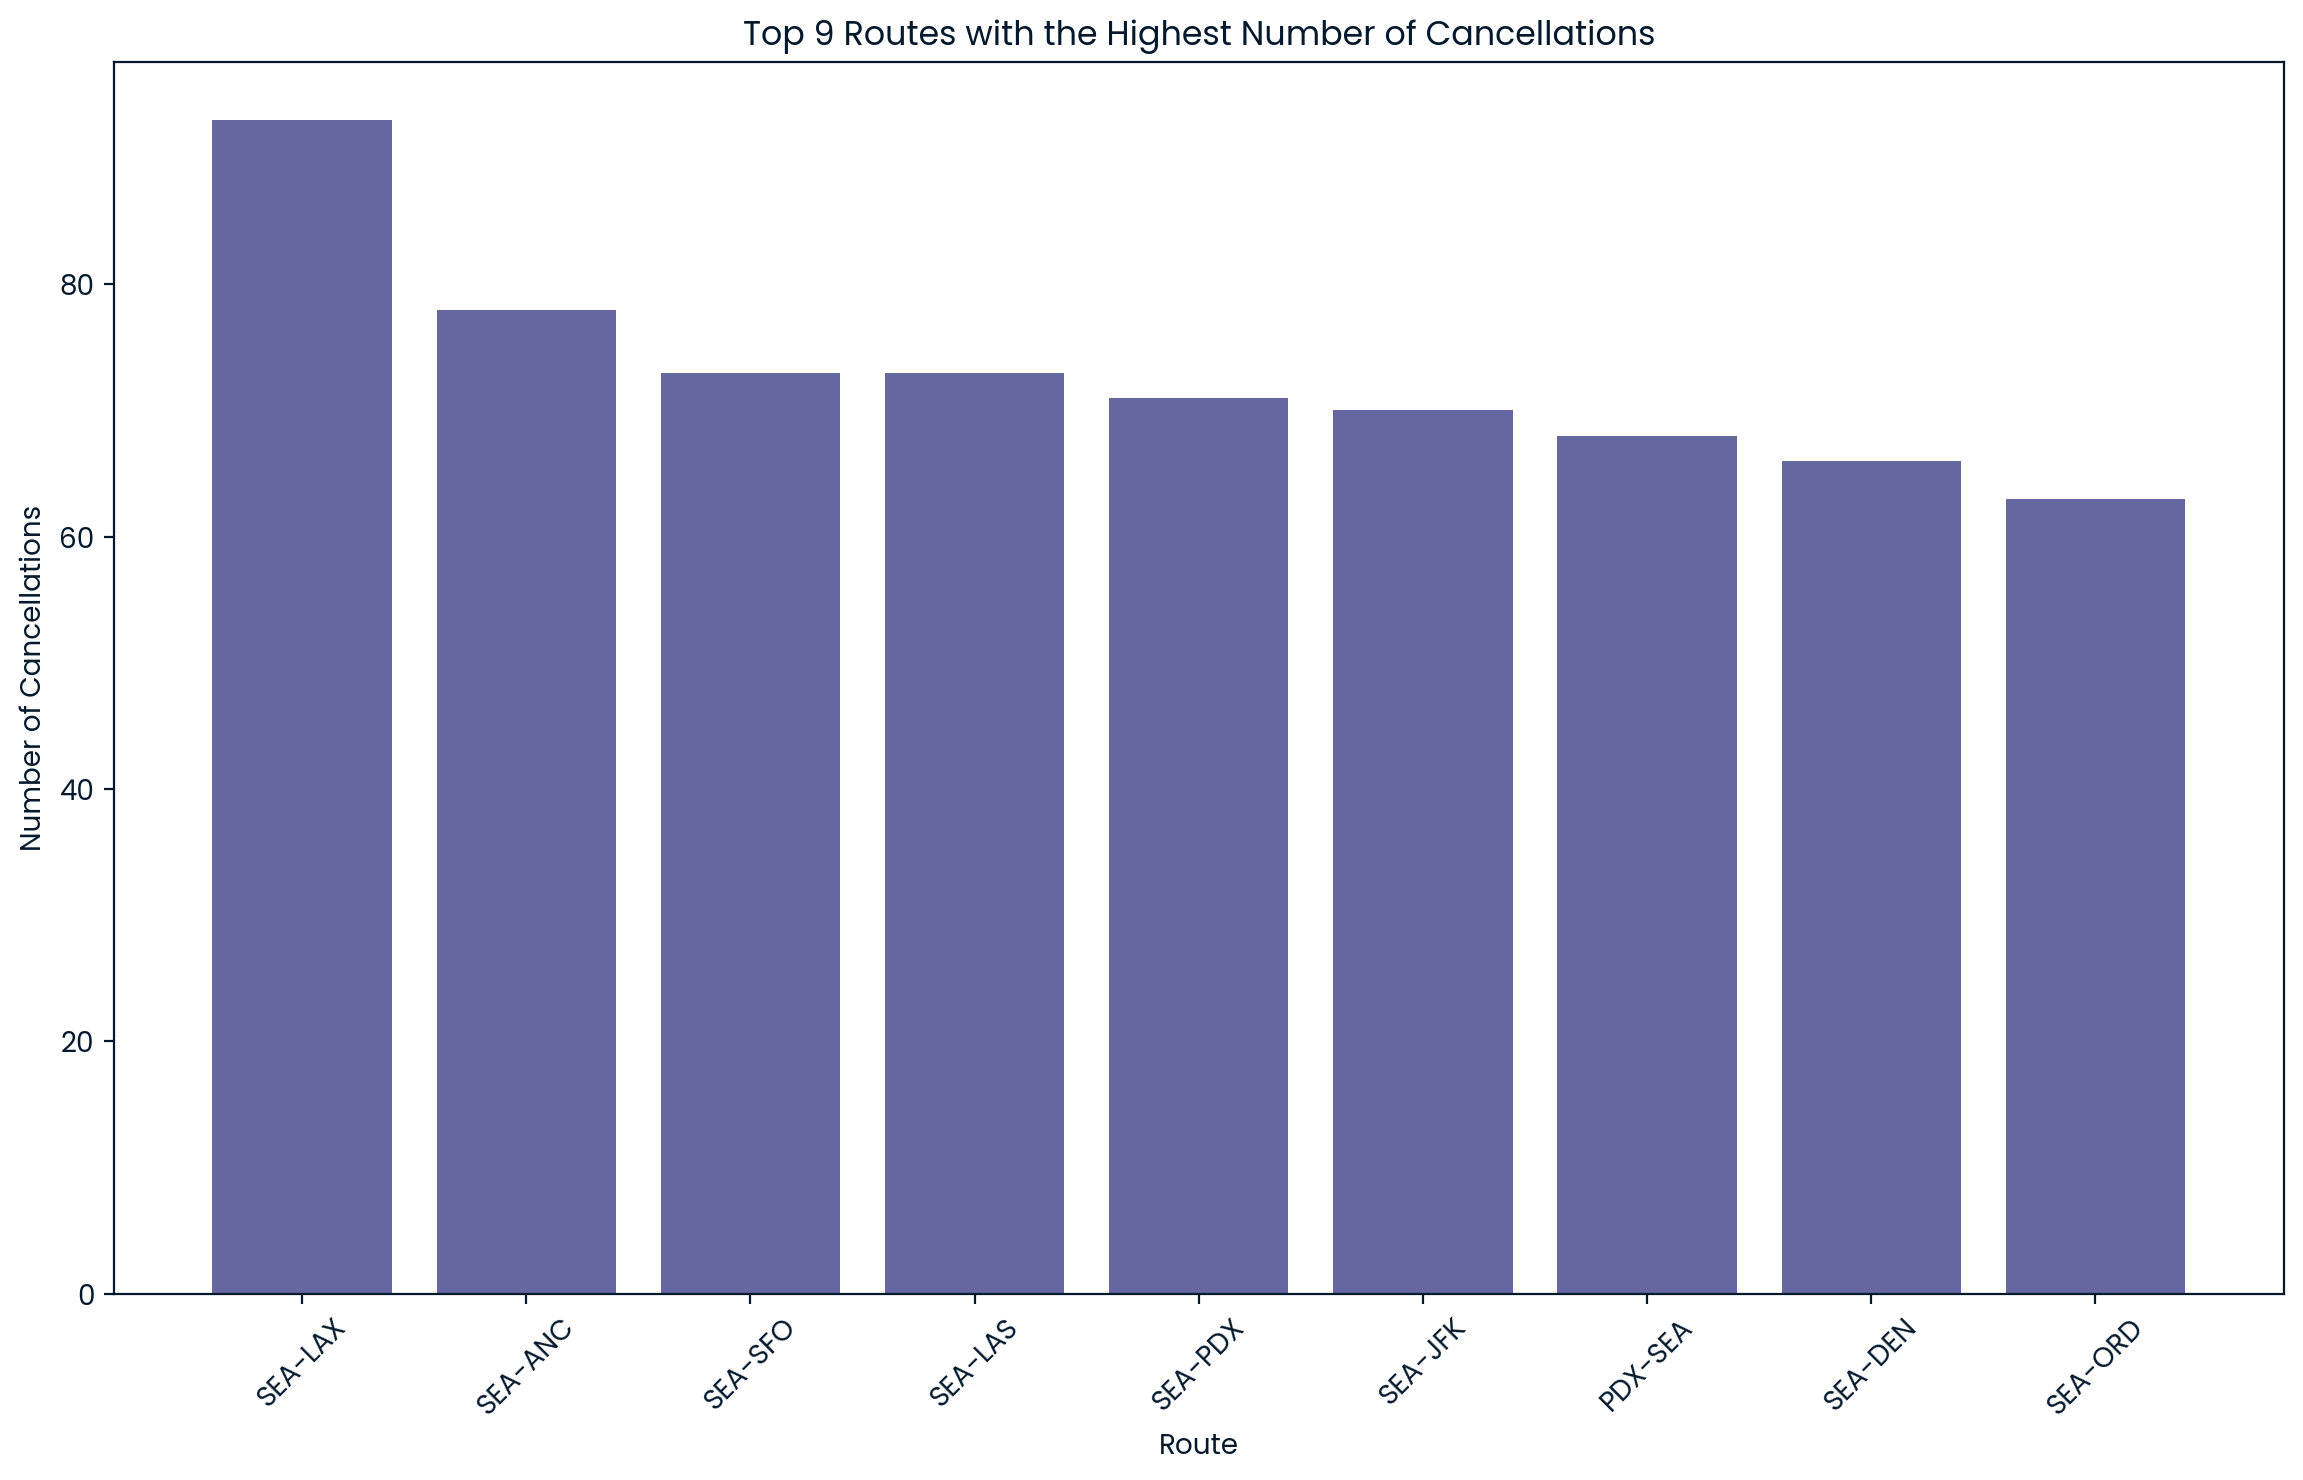

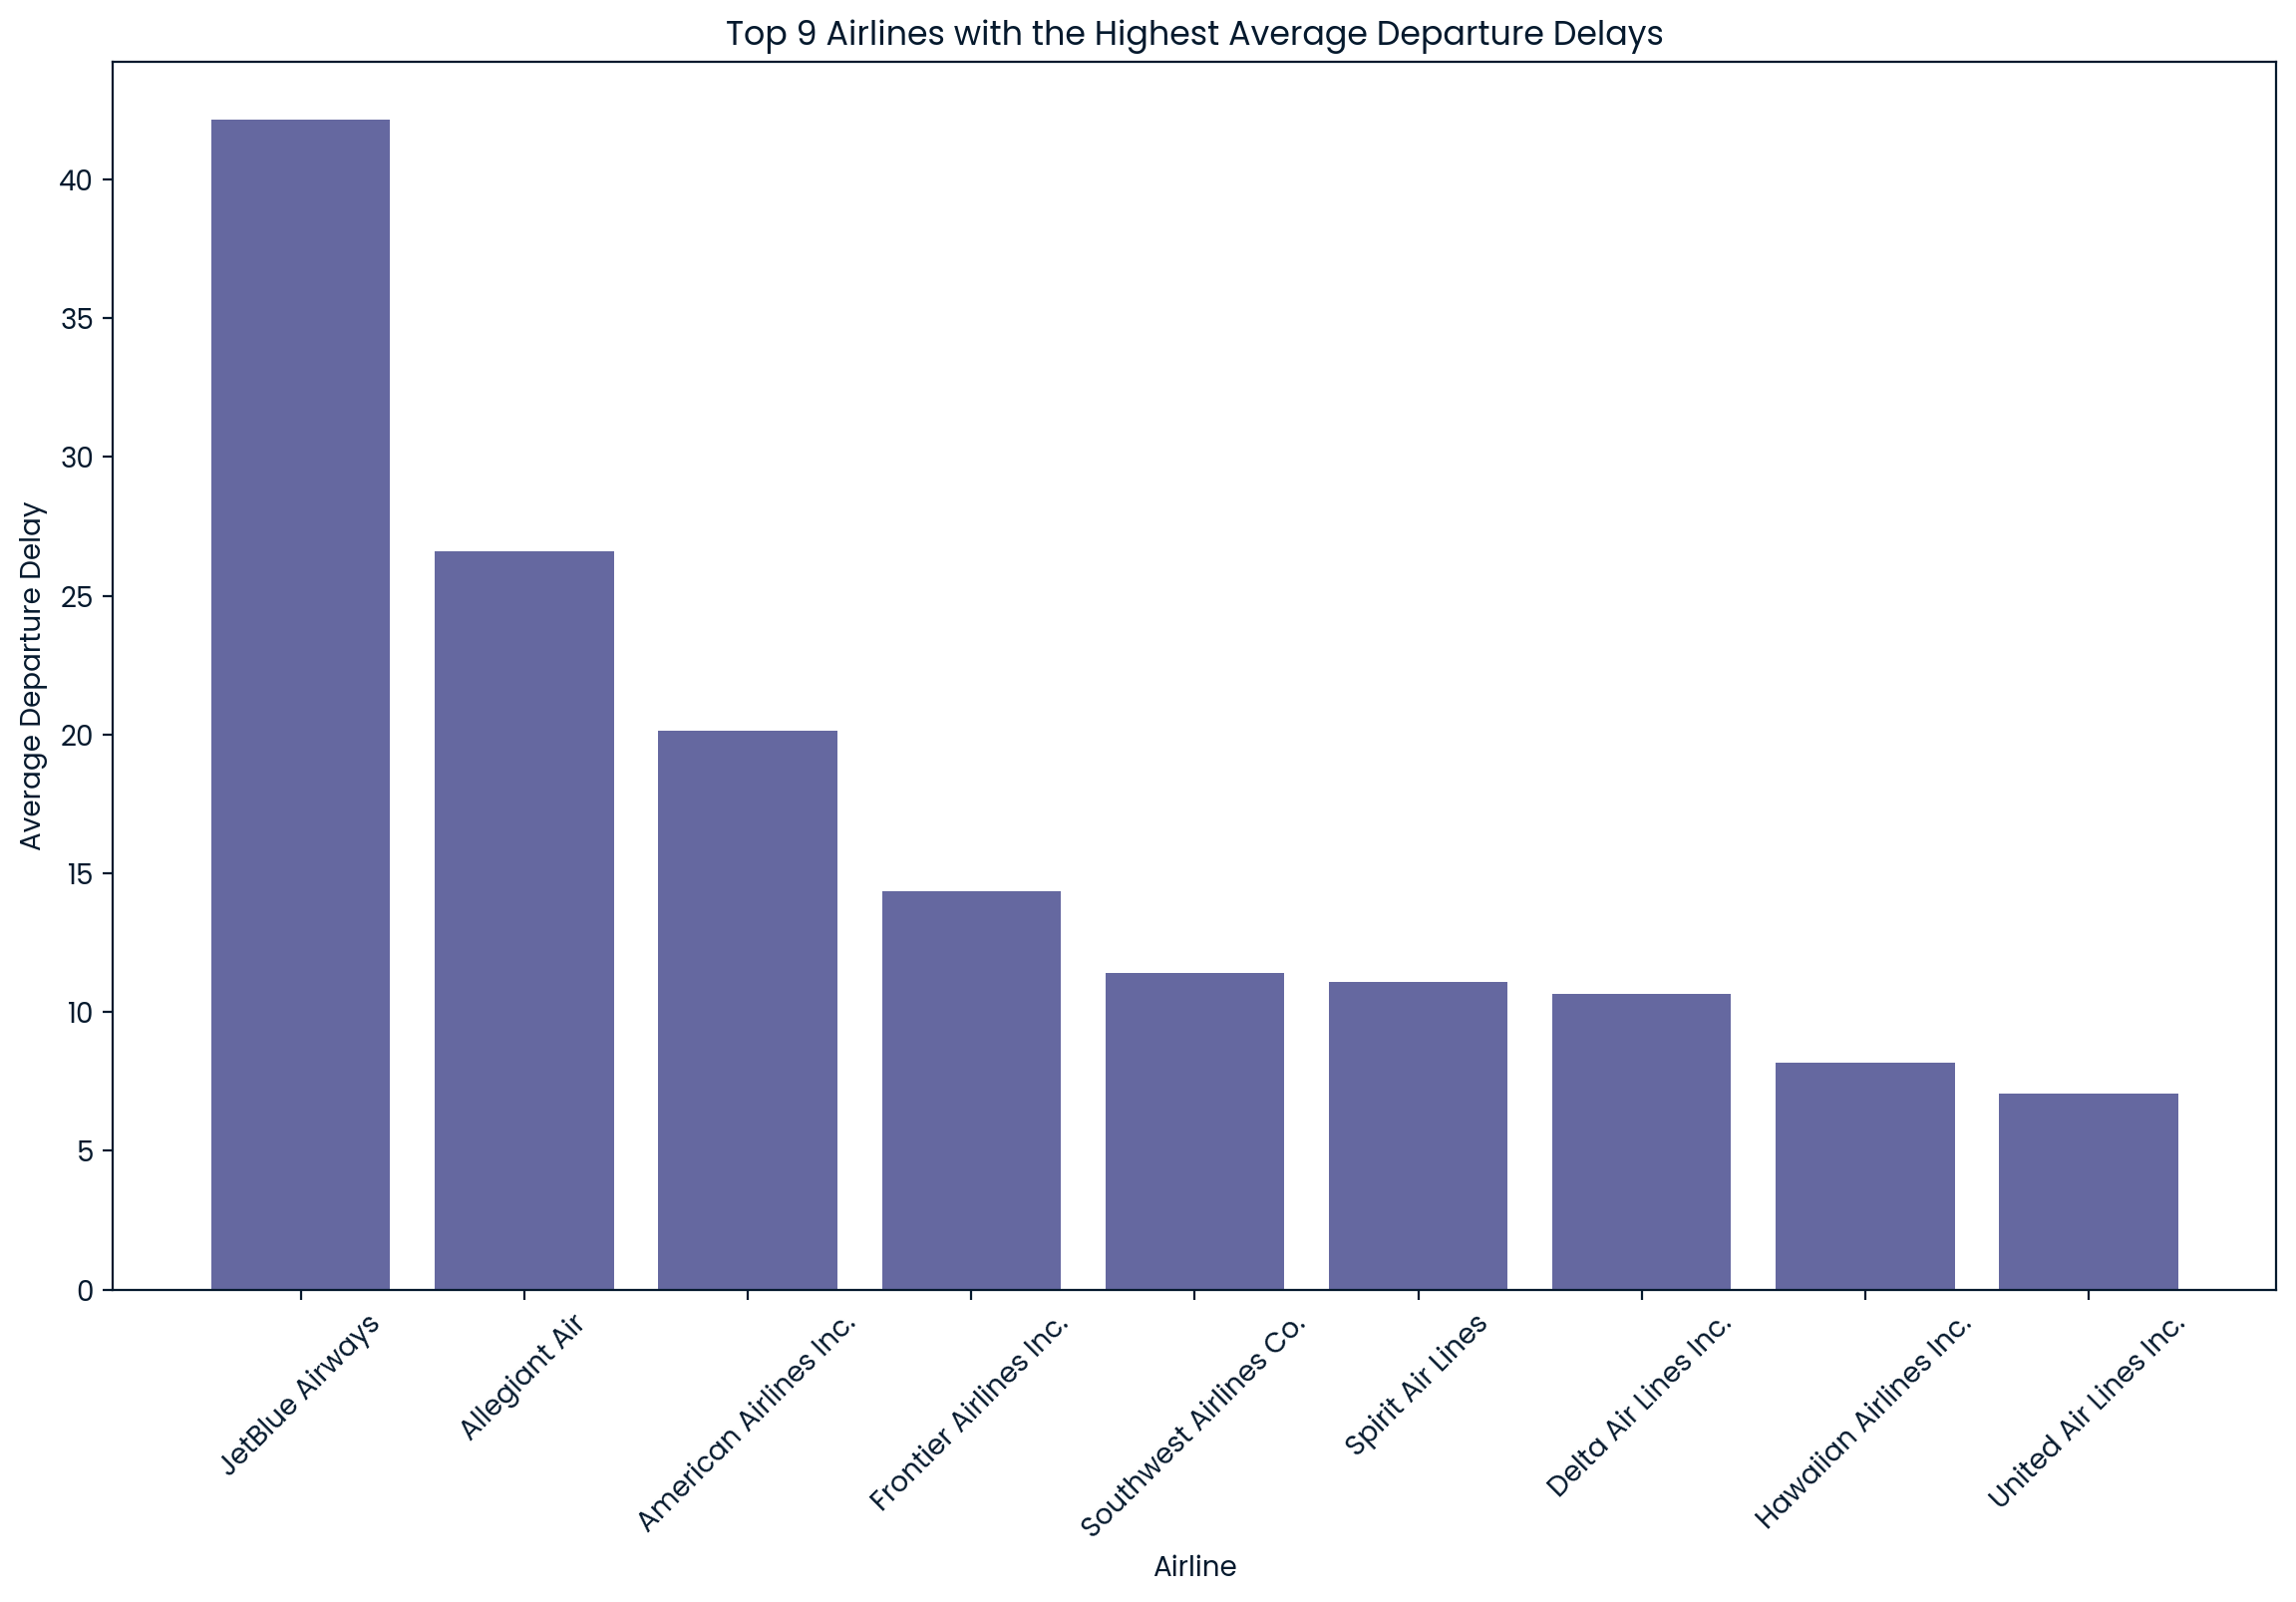

In [79]:
# Produce two bar graphs to show (1) the top 9 highest number of cancellations by route in a plot called top9_route_cancels_bar and (2) the top 9 highest average departure delays by airline in a plot called top9_airline_delays_bar. 

top9_route_cancels = routes_delays_cancels.sort_values('dep_time', ascending=False).head(9)

# Create a bar graph for the top 9 routes with the highest number of cancellations
plt.figure(figsize=(14, 8))
plt.bar(top9_route_cancels['route'], top9_route_cancels['dep_time'])
plt.xlabel('Route')
plt.ylabel('Number of Cancellations')
plt.title('Top 9 Routes with the Highest Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

top9_airline_delays = airlines_delays_cancels.sort_values('dep_delay', ascending=False).head(9)

# Create a bar graph for the top 9 airlines with the highest average departure delays
plt.figure(figsize=(14, 8))
plt.bar(top9_airline_delays['airline'], top9_airline_delays['dep_delay'])
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay')
plt.title('Top 9 Airlines with the Highest Average Departure Delays')
plt.xticks(rotation=45)
plt.show()

In [80]:
# Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX, setting wind_response to True if so and False if not.
weather["group"] = weather["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")
wind_grouped_data = weather.groupby(["group", "origin"]).agg(
    mean_dep_delay=("dep_delay", "mean")
)

print(wind_grouped_data)

wind_response = True

                 mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060
